In [6]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [50]:
timed_df = pd.read_csv(
    "Fetched_nifty500_fm2019_withDATE.csv")
timed_df.fillna(0, inplace=True)


timed_df['Date'] = pd.to_datetime(timed_df['Date'])
timed_df.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
timed_df = timed_df.loc[:, (timed_df != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(timed_df)
timed_df = timed_df.loc[:, (timed_df != 0).sum() >= threshold]

In [51]:
# Assuming timed_df is your DataFrame indexed by date

# Set the desired start and end dates
start_date = '2019-09-19'
end_date = '2024-02-08'

# Use loc to select rows within the specified date range
timed_df = timed_df.loc[start_date:end_date]

# Set the desired number of columns to keep
num_columns_to_keep = 50 #Replace with your desired number


# first num columns
# timed_df = timed_df.iloc[:, :num_columns_to_keep]

# last num columns 
# timed_df = timed_df.iloc[:, -num_columns_to_keep:]

#random num columns
timed_df = timed_df.sample(n=num_columns_to_keep, axis=1)


timed_df.columns

Index(['BORORENEW', 'PGHL', 'HAPPSTMNDS', 'BAJAJ-AUTO', 'HINDPETRO',
       'FEDERALBNK', 'SUMICHEM', 'JKPAPER', 'BAYERCROP', 'GRAPHITE',
       'PRINCEPIPE', 'INDUSINDBK', 'GSPL', 'AAVAS', 'LTTS', 'RTNINDIA',
       'ASIANPAINT', 'FDC', 'USHAMART', 'CSBBANK', 'ROUTE', 'DEEPAKFERT',
       'DIXON', 'HONAUT', 'BERGEPAINT', 'ABCAPITAL', 'INDIANB', 'ENGINERSIN',
       'IBULHSGFIN', 'TRIDENT', 'TEAMLEASE', 'KEC', 'GLAXO', 'GSFC',
       'BRITANNIA', 'CENTRALBK', 'CHOLAHLDNG', 'NLCINDIA', 'ATUL', 'CYIENT',
       'APLLTD', 'ISEC', 'IDBI', 'INDHOTEL', 'SAFARI', 'INDIGO', 'NH',
       'GRASIM', 'TVSMOTOR', 'AEGISCHEM'],
      dtype='object')

In [55]:
# fill values with the next non zero value even when there are consecutive zeros
timed_df = timed_df.replace(0, np.nan).fillna(method='ffill')

# fill values with the previous non zero value even when there are consecutive zeros
timed_df = timed_df.replace(0, np.nan).fillna(method='bfill')


In [56]:
timed_df.isna().sum().sum()

0

In [18]:
# Show daily returns
returns = timed_df.pct_change()
returns.fillna(0, inplace=True)
returns.replace([np.inf, -np.inf], 0, inplace=True)

returns

,JKPAPER,AXISBANK,PETRONET,RITES,BANKINDIA,BHEL,MCDOWELL-N,IDFCFIRSTB,BATAINDIA,JBMA,...,GODREJIND,SHREECEM,PHOENIXLTD,HEG,IDBI,BEML,NMDC,ABB,BRIGADE,GNFC
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-20,0.026485,0.066045,0.045107,0.008286,0.082808,0.056962,0.039397,0.061576,0.064164,0.079248,...,0.052177,0.073799,0.005402,0.000904,0.056985,0.023878,0.041120,0.063111,0.014633,0.088759
2019-09-23,-0.002580,0.066363,-0.050666,0.007796,0.042972,0.033932,0.039346,0.004640,0.063457,0.008090,...,-0.004103,0.034712,0.018560,-0.028540,0.076522,0.094540,0.046365,0.102299,0.038630,0.007811
2019-09-24,-0.014782,-0.029083,0.013046,0.100565,-0.013966,0.001931,0.002699,-0.011547,-0.006322,0.200000,...,-0.003649,0.000638,-0.025962,0.012132,0.101777,0.039882,-0.020241,0.012941,-0.024547,0.032696
2019-09-25,0.043511,-0.013416,0.008780,0.010448,-0.058782,-0.033719,0.000846,0.003505,-0.008745,0.043467,...,-0.013705,-0.023762,0.009424,-0.032451,0.082112,-0.046391,-0.044109,-0.021451,-0.014489,-0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,-0.029422,-0.015863,0.014114,-0.003271,0.042297,0.027692,0.005555,-0.010192,-0.004626,-0.009832,...,-0.009971,-0.039158,0.054627,-0.001651,0.000574,0.005585,0.045031,-0.014430,0.022438,-0.001771
2024-02-05,-0.044692,-0.005201,0.014474,0.068641,-0.085450,0.006416,-0.021316,0.008480,-0.014115,0.012470,...,0.005436,-0.052687,0.071140,0.035061,0.069381,-0.026346,0.025048,-0.025053,0.005862,-0.028388
2024-02-06,0.021824,-0.010787,0.062374,0.017627,-0.035354,-0.014875,0.008561,-0.003003,0.007298,0.028029,...,-0.000626,0.022801,-0.001111,0.056536,0.011260,-0.031729,0.008697,0.007967,0.023166,0.005689


In [19]:
# Annualized covariance matrix

# cov_matrix_annual = returns.cov()*252
cov_matrix_annual = returns.cov()*246
cov_matrix_annual.fillna(0, inplace=True)
cov_matrix_annual

,JKPAPER,AXISBANK,PETRONET,RITES,BANKINDIA,BHEL,MCDOWELL-N,IDFCFIRSTB,BATAINDIA,JBMA,...,GODREJIND,SHREECEM,PHOENIXLTD,HEG,IDBI,BEML,NMDC,ABB,BRIGADE,GNFC
JKPAPER,0.200676,0.062803,0.037677,0.045954,0.069962,0.082449,0.041029,0.077423,0.044753,0.059589,...,0.027748,0.042191,0.038161,0.071844,0.068114,0.060600,0.061630,0.036943,0.058820,0.075860
AXISBANK,0.062803,0.142294,0.028993,0.035803,0.059977,0.068284,0.038131,0.084458,0.048046,0.052147,...,0.032352,0.043907,0.034272,0.054461,0.057183,0.059515,0.055338,0.030819,0.054057,0.056220
PETRONET,0.037677,0.028993,0.077258,0.023217,0.034459,0.048632,0.025405,0.038651,0.023464,0.032920,...,0.020047,0.024764,0.024021,0.040461,0.040728,0.027678,0.036712,0.019540,0.022922,0.034917
RITES,0.045954,0.035803,0.023217,0.133608,0.041269,0.055522,0.022463,0.048799,0.029528,0.039370,...,0.021213,0.029788,0.024618,0.042074,0.054307,0.040108,0.038349,0.029771,0.030500,0.049631
BANKINDIA,0.069962,0.059977,0.034459,0.041269,0.203499,0.090886,0.033614,0.081085,0.032878,0.051023,...,0.037960,0.040715,0.034948,0.073815,0.100231,0.063722,0.065236,0.032698,0.039358,0.055606
BHEL,0.082449,0.068284,0.048632,0.055522,0.090886,0.254007,0.051239,0.095589,0.049980,0.073725,...,0.043056,0.047887,0.045727,0.078233,0.098332,0.085241,0.095747,0.039491,0.059233,0.087531
MCDOWELL-N,0.041029,0.038131,0.025405,0.022463,0.033614,0.051239,0.092385,0.047086,0.034948,0.029470,...,0.026617,0.028855,0.028137,0.032523,0.037391,0.037178,0.037390,0.029265,0.035446,0.037685
IDFCFIRSTB,0.077423,0.084458,0.038651,0.048799,0.081085,0.095589,0.047086,0.168253,0.054351,0.064233,...,0.041934,0.051376,0.036879,0.082765,0.085726,0.062961,0.077710,0.039580,0.053337,0.072400
BATAINDIA,0.044753,0.048046,0.023464,0.029528,0.032878,0.049980,0.034948,0.054351,0.078222,0.039617,...,0.023077,0.033397,0.029214,0.042058,0.046029,0.033451,0.038486,0.027951,0.033715,0.041451
JBMA,0.059589,0.052147,0.032920,0.039370,0.051023,0.073725,0.029470,0.064233,0.039617,0.313434,...,0.035484,0.042728,0.031061,0.076932,0.066017,0.044876,0.050438,0.038945,0.038543,0.055261


In [20]:
weights = np.full(timed_df.shape[1], 1 / timed_df.shape[1])
weights

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [21]:
# Calculate PORTFOLIO variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.04726428600691721

In [604]:
# Calculate PORTFOLIO volatility (std. dev)
port_volatility = np.sqrt(port_variance)
port_volatility

0.37822297414406336

In [605]:
# Annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

-1.2384051193626802

In [606]:
# DISPLAY

percent_var = str(round(port_variance, 2)*100) + "%"
percent_vol = str(round(port_volatility, 2)*100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print ("Expected Annual Return: " + percent_ret)
print ("Annual Volatility: " + percent_vol)
print ("Annual Variance: " + percent_var)

Expected Annual Return: -124.0%
Annual Volatility: 38.0%
Annual Variance: 14.000000000000002%


# OPTIMIZATION

In [607]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [608]:
# mu = expected_returns.mean_historical_return(timed_df, frequency=252)

mu = expected_returns.ema_historical_return(timed_df, log_returns=True)

# mu = expected_returns.return_model(timed_df)


# mu = expected_returns.capm_return(timed_df)


mu.fillna(0, inplace = True)
mu.replace(np.inf, 0.0, inplace=True)

In [609]:
S = risk_models.sample_cov(timed_df)

# S = risk_models.exp_cov(timed_df)

# S = risk_models.CovarianceShrinkage(timed_df)

# S = (S + S.T) / 2

S.fillna(0, inplace = True)
S.replace(np.inf, 0.0, inplace=True)

In [610]:
# S_normalized
# S_f = (S + S.T) / 2

#S_reg
S_f = S + 1e-6 * np.eye(S.shape[0])


In [611]:
# ef = EfficientFrontier(mu, S)
ef = EfficientFrontier(mu, S_f, solver="ECOS")
# solvers: ECOS, OSQP

# weights = ef.max_sharpe()


# Maximize Return for a Target Volatility:
# weights = ef.efficient_return(target_return=0.25)


# Minimize Volatility for a Target Return:
weights = ef.efficient_risk(target_volatility=0.30)

refined_weights = ef.clean_weights()


In [612]:
refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}
total_weight = sum(refined_weights.values())
refined_weights_percent = {
    key: (value / total_weight) * 100 for key, value in refined_weights.items()}

In [613]:
refined_weights_percent

{'SHERVANI': 11.809,
 'TITAN': 34.788999999999994,
 'SAFARIND': 2.005,
 'TATAINVEST': 14.466999999999999,
 'MODWOOL': 0.17700000000000002,
 'OLECTRA': 1.0630000000000002,
 'PAUSHAKLTD': 23.925,
 'HSCL': 11.765}

In [660]:
invest = 100000
non_investable = []
invest_stocks = {}
for i in refined_weights_percent:
    maxim = timed_df[i][start_date]
    inv_amt = refined_weights_percent[i] * invest / 100
    if inv_amt < maxim or refined_weights_percent[i] < 1:
        non_investable.append(i)
        continue
    
    invest_stocks[i] = inv_amt


invest_stocks, non_investable

({'SHERVANI': 11809.0,
  'TITAN': 34788.99999999999,
  'SAFARIND': 2005.0,
  'TATAINVEST': 14466.999999999998,
  'OLECTRA': 1063.0000000000002,
  'PAUSHAKLTD': 23925.0,
  'HSCL': 11765.0},
 ['MODWOOL'])

In [661]:
# get sum of all the investable stocks
sum_investable = sum(invest_stocks.values())
remaining = invest - sum_investable

sum_investable, remaining

(99823.0, 177.0)

In [662]:
non_investable

['MODWOOL']

In [642]:
for i in non_investable:
    c = timed_df[i][-1]
    if c < remaining:
        invest_stocks[i] = c
        remaining -= c
        non_investable.remove(i)

In [643]:
non_investable

[]

In [644]:
invest_stocks, remaining

({'SHERVANI': 11809.0,
  'TITAN': 34788.99999999999,
  'SAFARIND': 2005.0,
  'TATAINVEST': 14466.999999999998,
  'OLECTRA': 1063.0000000000002,
  'PAUSHAKLTD': 23925.0,
  'HSCL': 11765.0,
  'MODWOOL': 10.460000038146973},
 166.53999996185303)

In [645]:
sum(list(invest_stocks.values()))

99833.46000003815

In [646]:
# new_df = timed_df[non_investable]
# # new_df.drop(invest_stocks.keys(), axis=1, inplace=True)
# mu = expected_returns.ema_historical_return(new_df, log_returns=True)

# # mu = expected_returns.return_model(timed_df)


# # mu = expected_returns.capm_return(timed_df)


# mu.fillna(0, inplace=True)
# mu.replace(np.inf, 0.0, inplace=True)

# S = risk_models.sample_cov(new_df)

# # S = risk_models.exp_cov(new_df)

# # S = risk_models.CovarianceShrinkage(timed_df)

# # S = (S + S.T) / 2

# S.fillna(0, inplace=True)
# S.replace(np.inf, 0.0, inplace=True)
# S_f = S + 1e-6 * np.eye(S.shape[0])

In [647]:
# ef = EfficientFrontier(mu, S_f, solver="ECOS")
# weights = ef.efficient_risk(target_volatility=0.7)
# refined_weights = ef.clean_weights()
# refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}
# total_weight = sum(refined_weights.values())
# refined_weights_percent = {
#     key: (value / total_weight) * 100 for key, value in refined_weights.items()}

In [648]:
# refined_weights_percent

In [649]:
# invest = remaining
# non_investable = []
# invest_stocks = {}
# for i in refined_weights_percent:
#     maxim = timed_df[i][-1]
#     inv_amt = refined_weights_percent[i] * invest / 100
#     if inv_amt < maxim or refined_weights_percent[i] < 1:
#         non_investable.append(i)
#         continue

#     invest_stocks[i] = inv_amt


# invest_stocks, non_investable

In [650]:
# # get sum of all the investable stocks
# sum_investable = sum(invest_stocks.values())
# remaining = invest - sum_investable

# sum_investable, remaining

In [651]:
# # put the above in a while loop to keep investing the remaining amount
# # declare variables
# invest = 10000
# non_investable = []
# invest_stocks = {}
# refined_weights = {}
# new_df = timed_df
# for i in range(5):
#     mu = expected_returns.ema_historical_return(new_df, log_returns=True)

#     # mu = expected_returns.return_model(timed_df)


#     # mu = expected_returns.capm_return(timed_df)


#     mu.fillna(0, inplace=True)
#     mu.replace(np.inf, 0.0, inplace=True)

#     # S = risk_models.sample_cov(timed_df)

#     S = risk_models.exp_cov(new_df)

#     # S = risk_models.CovarianceShrinkage(timed_df)

#     # S = (S + S.T) / 2

#     S.fillna(0, inplace=True)
#     S.replace(np.inf, 0.0, inplace=True)
#     S_f = S + 1e-6 * np.eye(S.shape[0])

#     ef = EfficientFrontier(mu, S_f, solver="ECOS")
#     weights = ef.efficient_return(target_return=0.25)
#     refined_weights = ef.clean_weights()
#     refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}
#     total_weight = sum(refined_weights.values())
#     refined_weights_percent = {
#         key: (value / total_weight) * 100 for key, value in refined_weights.items()}

#     for i in refined_weights_percent:
#         maxim = timed_df[i][-1]
#         inv_amt = refined_weights_percent[i] * invest / 100
#         if inv_amt < maxim:
#             non_investable.append(i)
#             continue

#         invest_stocks[i] = inv_amt

#     invest_stocks, non_investable

#     # get sum of all the investable stocks
#     sum_investable = sum(invest_stocks.values())
#     remaining = invest - sum_investable
#     invest = remaining


In [652]:
# invest

In [653]:
# print(refined_weights)
# print(weights)
# print(ef)

In [654]:
# print ()
# print ()
# print ("-----PORTFOLIO PERFORMANCE-----")
# print ()


# ef.portfolio_performance(verbose = True)


# print ()
# print ()
# print ("-----ASSET ALLOCATION-----")
# print ()


# refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}

# # Normalize the percentages
# total_weight = sum(refined_weights.values())
# refined_weights_percent = {key: (value / total_weight) * 100 for key, value in refined_weights.items()}
# assest = []
# weight = {}
# print("Count: ", len(refined_weights_percent))
# for key, value in refined_weights_percent.items():
#     assest.append(key)
#     weight[key] = value
#     print(f"{key}: {value:.2f}%")


In [655]:
newTimeDf = timed_df[[i for i in refined_weights.keys()]]

In [656]:
sum(list(refined_weights.values()))

1.0

In [659]:
import math


def DiscreteAllocation(timed_df, weight, investAmount, startDate):
    remainder = 0
    newWeights = {}
    for key, value in weight.items():
        allocatedPrice = (value/100) * investAmount
        # Use Start date in iloc
        units = math.floor(allocatedPrice / timed_df[key][startDate])
        rem: pd.Series = allocatedPrice - units * timed_df[key][startDate]
        newWeights[key] = {"price": timed_df[key][startDate], "units": units, "allocated":
                           units * timed_df[key][startDate], "remainder": rem}
        remainder += rem

    return remainder, newWeights

r, weights = DiscreteAllocation(newTimeDf, refined_weights,invest, start_date)

In [658]:
weights

{'SHERVANI': {'price': 30.899999618530277,
  'units': 3,
  'allocated': 92.69999885559083,
  'remainder': 25.390001144409155},
 'TITAN': {'price': 72.52745819091797,
  'units': 4,
  'allocated': 290.1098327636719,
  'remainder': 57.78016723632811},
 'SAFARIND': {'price': 7.260000228881836,
  'units': 2,
  'allocated': 14.520000457763672,
  'remainder': 5.529999542236329},
 'TATAINVEST': {'price': 488.0,
  'units': 0,
  'allocated': 0.0,
  'remainder': 144.67},
 'MODWOOL': {'price': 61.25, 'units': 0, 'allocated': 0.0, 'remainder': 1.77},
 'OLECTRA': {'price': 26.799999237060547,
  'units': 0,
  'allocated': 0.0,
  'remainder': 10.63},
 'PAUSHAKLTD': {'price': 64.94999694824219,
  'units': 3,
  'allocated': 194.84999084472656,
  'remainder': 44.40000915527344},
 'HSCL': {'price': 42.005001068115234,
  'units': 2,
  'allocated': 84.01000213623047,
  'remainder': 33.63999786376954}}

In [584]:
# get sum of remainder weights
rem_sum = r
for i in weights:
    del weights[i]["remainder"]

In [585]:
df = pd.DataFrame(weights)
df.T.sum()

price        811.549988
units          0.000000
allocated    100.001000
dtype: float64

In [543]:
# allocate the remainder sum to non_investable
for i in non_investable:
    c = timed_df[i][-1]
    if c < rem_sum:
        # find how many units of i can be allocated
        units = math.floor(rem_sum / c)
        rem = rem_sum - units * c
        weights[i] = {"price": c, "units": units, "allocated": rem_sum, "remainder": rem}
        rem_sum = rem
        non_investable.remove(i)


        

In [544]:
weights

{'NATPEROX': {'price': 243.1499938964844,
  'units': 115,
  'allocated': 28140.718592814068},
 'COFORGE': {'price': 179.10000610351562,
  'units': 180,
  'allocated': 32317.676823231766},
 'TANFACIND': {'price': 36.5, 'units': 361, 'allocated': 13203.867961320384},
 'FILATEX': {'price': 3.7200000286102295,
  'units': 445,
  'allocated': 1655.9834401655983},
 'COLPAL': {'price': 342.79998779296875,
  'units': 70,
  'allocated': 24015.759842401574},
 'VAIBHAVGBL': {'price': 6.28000020980835,
  'units': 106,
  'allocated': 665.9933400665993}}

In [545]:
pd.DataFrame(weights).T

,price,units,allocated
NATPEROX,243.149994,115.0,28140.718593
COFORGE,179.100006,180.0,32317.676823
TANFACIND,36.500000,361.0,13203.867961
FILATEX,3.720000,445.0,1655.983440
COLPAL,342.799988,70.0,24015.759842
VAIBHAVGBL,6.280000,106.0,665.993340


In [491]:
from collections import defaultdict


def BackTest(df, startDate, duration, weights):
    """
    duration: in days
    startDate: starting date string
    weights: weights dict 
    """
    window = 6 #month
    start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
    end = start + datetime.timedelta(days=30*window)

    end_stop_date = start + datetime.timedelta(days=duration)
    x = defaultdict(dict)
    c = 1
    while end < end_stop_date:
        end = start + datetime.timedelta(days=30*window)
        temp = df.loc[start:end, :]

        # print(temp.iloc[-1,0])
        for i in weights.keys():
            x[i][c] = {
                "date_start": str(temp[i].iloc[0:].index[0])[:10],
                "date_end": str(temp[i].iloc[-1:].index[0])[:10],
                "date_start_price": temp[i].iloc[0],
                "date_end_price": temp[i].iloc[-1]
            }
        for key, values in x.items():
            st = values[c]["date_start_price"]
            en = values[c]["date_end_price"]

            st_price = st * weights[key]["units"]
            en_price = en * weights[key]["units"]
            pct_cng = (en_price - st_price)/st_price * 100
            values[c]["st_price"] = st_price
            values[c]["en_price"] = en_price

            values[c]["pct_change"] = pct_cng
        start = end
        c += 1

    return x, c-1

In [492]:
window, total_windows = BackTest(newTimeDf,"2010-01-05", 3000, weights)


In [493]:
def PercentChange(window, totalWindows):
    pctChange = []
    endDate = []
    for part in range(1, totalWindows+1):
        startPrice = endPrice = 0
        end = None
        for key, value in window.items():
            cycle = window[key].get(part)
            startPrice += cycle['st_price']
            endPrice += cycle['en_price']
            # print(part , cycle['date_end'])
            end = cycle['date_end']
        endDate.append(end)
        pctChange.append(((endPrice - startPrice)/startPrice * 100))
    return pctChange, endDate

In [494]:
portfolioPercentChange, endDates = PercentChange(window, total_windows)

In [495]:
portfolio = pd.DataFrame({
    'Date': endDates,
    'PctChange': portfolioPercentChange
})


In [496]:
print(portfolio)

          Date  PctChange
0   2010-07-02   4.664764
1   2010-12-31  34.429694
2   2011-06-29  -0.307087
3   2011-12-26 -16.019863
4   2012-06-22  20.395753
5   2012-12-20  18.909760
6   2013-06-18  -8.688819
7   2013-12-13   5.658749
8   2014-06-13  37.127419
9   2014-12-10   3.334191
10  2015-06-08  -4.904065
11  2015-12-04  21.962462
12  2016-06-02 -11.581748
13  2016-11-29  15.202602
14  2017-05-26  24.274509
15  2017-11-24  41.777306
16  2018-05-23  34.988473


<Axes: xlabel='Date', ylabel='PctChange'>

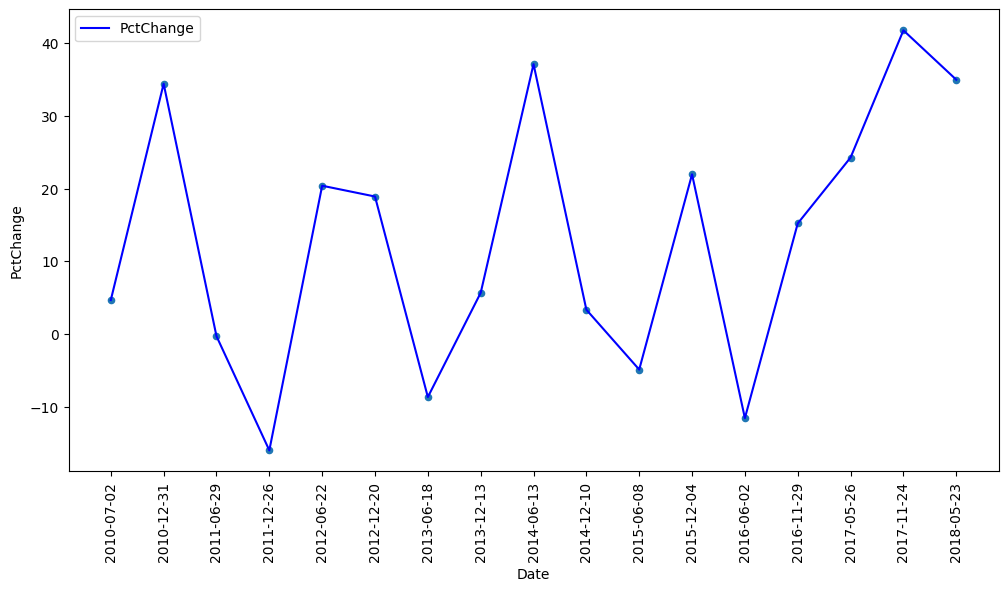

In [497]:
# plt.plot(data=portfolio)
ax = portfolio.plot(x="Date", y="PctChange", kind="scatter", figsize=[12,6], style='b', rot=90)
portfolio.plot(x="Date", y="PctChange", kind="line", ax=ax, style='b', rot=90)

In [498]:
nifty = pd.read_csv("nifty.csv")

In [499]:
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
nifty = nifty.loc[:, (nifty != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(nifty)
nifty = nifty.loc[:, (nifty != 0).sum() >= threshold]
nifty = nifty.iloc[::-1]

In [500]:
# rename Close to Nifty
nifty.rename(columns={'Close': 'nifty'}, inplace=True)

In [501]:
# reverse the index
nifty = nifty.iloc[::-1]

In [502]:
# from collections import defaultdict
# def BackTest_Nifty(nData,startDate, duration):
#     window = 2  # month
#     print(type(startDate))
#     start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
#     end = start + datetime.timedelta(days=30*window)

#     end_stop_date = start + datetime.timedelta(days=duration)
#     x = defaultdict(dict)
#     c = 1
#     print(type(end))
#     print(type(end_stop_date))

#     while end < end_stop_date:
#         end = start + datetime.timedelta(days=30*window)
#         temp = nData.loc[start:end, :]
#         # print(temp["Close"])
#         print(temp)
#         x["nifty"][c] = {
#             "date_start": str(temp["Close"].iloc[0:].index[0]),
#             "date_end": str(temp["Close"].iloc[-1:].index[0]),
#             "st_price": temp["Close"].iloc[0],
#             "en_price": temp["Close"].iloc[-1]
#         }
#         start = end
#         c += 1
#     return x, c-1

In [503]:
r, weights = DiscreteAllocation(nifty, {"nifty": 100.0}, 100000, "2010-01-05")

In [504]:
weights

{'nifty': {'price': 5277.89990234375,
  'units': 18,
  'allocated': 100000.0,
  'remainder': 4997.8017578125}}

In [505]:
win, total_ = BackTest(nifty, "2010-01-05", 3000, weights)

In [506]:
win, total_

(defaultdict(dict,
             {'nifty': {1: {'date_start': '2010-01-05',
                'date_end': '2010-07-02',
                'date_start_price': 5277.89990234375,
                'date_end_price': 5237.10009765625,
                'st_price': 95002.1982421875,
                'en_price': 94267.8017578125,
                'pct_change': -0.7730310434531371},
               2: {'date_start': '2010-07-05',
                'date_end': '2010-12-31',
                'date_start_price': 5235.89990234375,
                'date_end_price': 6134.5,
                'st_price': 94246.1982421875,
                'en_price': 110421.0,
                'pct_change': 17.16228565129767},
               3: {'date_start': '2010-12-31',
                'date_end': '2011-06-29',
                'date_start_price': 6134.5,
                'date_end_price': 5600.4501953125,
                'st_price': 110421.0,
                'en_price': 100808.103515625,
                'pct_change': -8.7056778007580

In [507]:
niftyPercentChange, niftyendDates = PercentChange(win, total_)

In [508]:
nifty_portfolio = pd.DataFrame({
    'Date': niftyendDates,
    'niftyPctChange': niftyPercentChange
})

In [509]:
print(nifty_portfolio)

          Date  niftyPctChange
0   2010-07-02       -0.773031
1   2010-12-31       17.162286
2   2011-06-29       -8.705678
3   2011-12-23      -15.828195
4   2012-06-22        8.326488
5   2012-12-20       15.675560
6   2013-06-18       -1.737540
7   2013-12-13        6.102928
8   2014-06-13       22.542120
9   2014-12-10       10.786787
10  2015-06-08       -3.728022
11  2015-12-04       -3.260133
12  2016-06-02        5.840656
13  2016-11-29       -0.934429
14  2017-05-26       17.844792
15  2017-11-24        8.170827
16  2018-05-23        0.391247


<Axes: xlabel='Date', ylabel='niftyPctChange'>

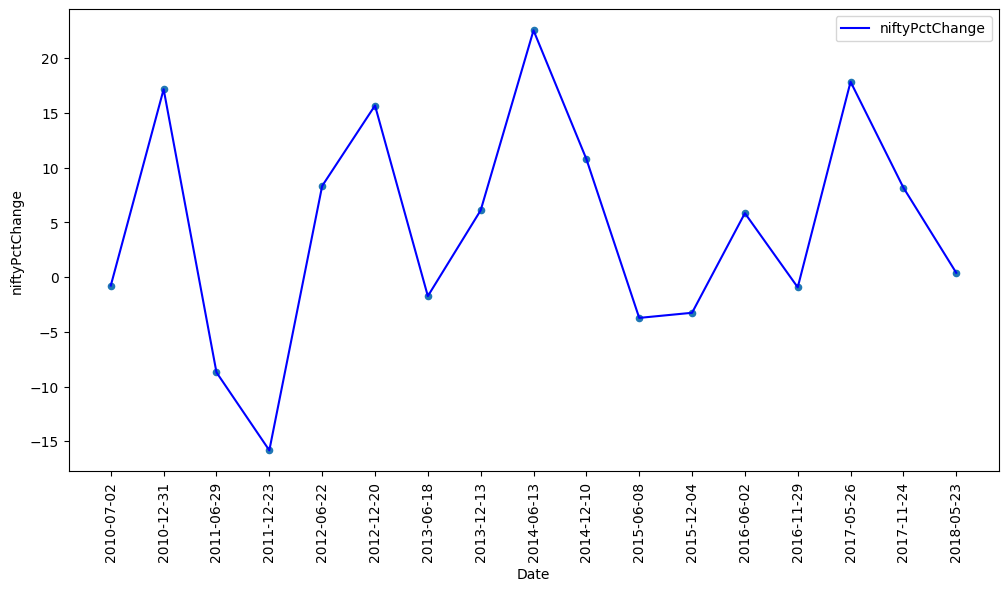

In [510]:
# plt.plot(data=portfolio)
nax = nifty_portfolio.plot(x="Date", y="niftyPctChange", kind="scatter",
                    figsize=[12, 6], style='b', rot=90)
nifty_portfolio.plot(x="Date", y="niftyPctChange", kind="line",
                     ax=nax, style='b', rot=90)

In [511]:
dats = pd.concat([portfolio, nifty_portfolio["niftyPctChange"]], axis=1)

In [512]:
dats.index = pd.to_datetime(dats['Date'])
# dats = dats.drop(["Date"], axis=1)

In [513]:
dats

,Date,PctChange,niftyPctChange
Date,,,
2010-07-02,2010-07-02,4.664764,-0.773031
2010-12-31,2010-12-31,34.429694,17.162286
2011-06-29,2011-06-29,-0.307087,-8.705678
2011-12-26,2011-12-26,-16.019863,-15.828195
2012-06-22,2012-06-22,20.395753,8.326488
2012-12-20,2012-12-20,18.909760,15.675560
2013-06-18,2013-06-18,-8.688819,-1.737540
2013-12-13,2013-12-13,5.658749,6.102928
2014-06-13,2014-06-13,37.127419,22.542120


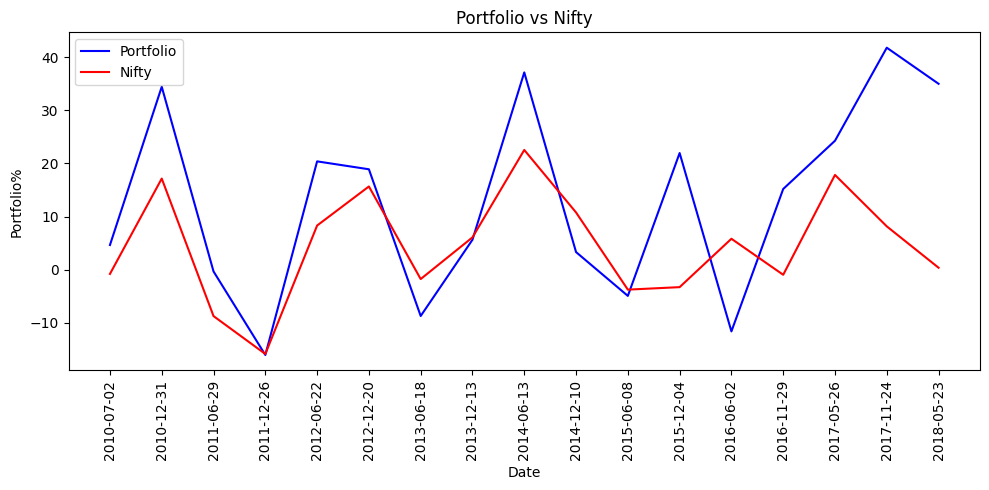

In [514]:
# x = dats.plot(x="Date", y="PctChange", kind="line", rot=90, xlabel="Date", ylabel="Portfolio%")
# dats.plot(x="Date", y="niftyPctChange", kind="line", ax=x, rot=90,xlabel="Date",ylabel="Portfolio%")

# plot using plt
plt.figure(figsize=(10, 5))
plt.plot(dats["Date"], dats["PctChange"], color="blue")
plt.plot(dats["Date"], dats["niftyPctChange"], color="red")
plt.xlabel("Date")
plt.ylabel("Portfolio%")
plt.xticks(rotation=90)
plt.title("Portfolio vs Nifty")
# add ledgend to the plot
plt.legend(["Portfolio", "Nifty"])
plt.tight_layout()


plt.show()